# Assignment 8: LSTM
*<span style="float:right;">Norine NDOUDI</span>*


In [93]:
import keras
import numpy as np

# Implement a function to generate all pairs of query and answer.
def generatePair( ):
    query = []
    answer = []

    for i in range(100):
        for j in range(100):
            # Add space character if necessary to be sure we have the lengths of queries and answers fixed as 5 and 4
            
            q_add = f"{i}+{j}" + ' ' * (5 - len(f"{i}+{j}"))
            a_add = f"+{i+j}" + ' ' * (4 - len(f"+{i+j}"))
            query.append(q_add)
            answer.append(a_add)

            q_sub = f"{i}-{j}" + ' ' * (5 - len(f"{i}-{j}"))
            a_sub = f"{i-j}" + ' ' * (4 - len(f"{i-j}"))
            query.append(q_sub)
            answer.append(a_sub)

    return query, answer

In [94]:
# Implement a function to encode a string into one-hot-encoding scheme.
def one_hot_encoding(string, tab):
    one_hot_encoding = []
    for char in string:
        one_hot_vector = np.zeros(len(tab)) #initialization of an array with only 0
        if char in tab:
            index = tab.index(char) #Get back the index of character
            one_hot_vector[index] = 1 #and change this index value from 0 to 1
        one_hot_encoding.append(one_hot_vector)
    return np.array(one_hot_encoding)

#### Explain how the code below implements Encoder-Decoder scheme.
As we can see, the model consists of three parts, the encoder, the repeatVecotr operation and the decoder.  

The first layer (LSTM layer) is the encoder part of the model with as input a sequence of shape (5,13). The `return_sequences`attribute has a false value, therefore, that creates a fixed-length vector.  
The second layer (repeatVector) repeats the output vector of the encoder's step.  
Then the third layer, another LSTM layer is the decoder part which taking as input the repeated vector and will return the entire output sequence because `return_sequences` has a true value.

In [95]:
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, Dense

# Implement a Encoder-Decoder LSTM network 
model = Sequential()
model.add(LSTM(64, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation="softmax"))


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

query, answer = generatePair()

# Shuffle the data set
query, answer = shuffle(query, answer, random_state=42)

# Creating train, validation and test dataset.
train_size = int(0.7 * len(query)) #Get 70% of the dataset
val_size = int(0.15 * len(query)) #Get 15%
test_size = int(0.15 * len(query)) #Get the 15% left

#Split to have the the 70% of data for train and the 30% data left
train_query, val_query, train_answer, val_answer = train_test_split(query, answer, test_size=(val_size + test_size), random_state=42)
#Then split again the 30% left to have 15% for the validation and test data set
val_query, test_query, val_answer, test_answer = train_test_split(val_query, val_answer, test_size=test_size, random_state=42)

print(len(train_query))
print(len(val_query))
print(len(test_query))

14000
3000
3000


In [97]:
# Use one-hot encoding for query and answer dataset
alphabet = ['0','1','2','3', '4','5','6','7','8','9','+','-',' '] 
train_X = np.array([one_hot_encoding(query, alphabet) for query in train_query])
train_Y = np.array([one_hot_encoding(answer, alphabet) for answer in train_answer])
val_X = np.array([one_hot_encoding(query, alphabet) for query in val_query])
val_Y = np.array([one_hot_encoding(answer, alphabet) for answer in val_answer])
test_X = np.array([one_hot_encoding(query, alphabet) for query in test_query])
test_Y = np.array([one_hot_encoding(answer, alphabet) for answer in test_answer])

After trying different hyperparameters, this is the hyperparameters we chose for our model.

In [98]:
from keras import optimizers

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), batch_size=32, epochs=50)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_X, test_Y)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/50
438/438 [==============================] - 56s 82ms/step - loss: 1.5880 - accuracy: 0.4864 - val_loss: 1.3154 - val_accuracy: 0.5491
Epoch 2/50
438/438 [==============================] - 16s 37ms/step - loss: 1.2177 - accuracy: 0.5670 - val_loss: 1.1500 - val_accuracy: 0.5789
Epoch 3/50
438/438 [==============================] - 17s 39ms/step - loss: 1.0595 - accuracy: 0.6145 - val_loss: 0.9900 - val_accuracy: 0.6450
Epoch 4/50
438/438 [==============================] - 20s 45ms/step - loss: 0.9858 - accuracy: 0.6449 - val_loss: 0.9363 - val_accuracy: 0.6774
Epoch 5/50
438/438 [==============================] - 17s 39ms/step - loss: 0.9317 - accuracy: 0.6670 - val_loss: 0.9178 - val_accuracy: 0.6723
Epoch 6/50
438/438 [==============================] - 19s 43ms/step - loss: 0.9008 - accuracy: 0.6767 - val_loss: 0.9084 - val_accuracy: 0.6687
Epoch 7/50
438/438 [==============================] - 25s 58ms/step - loss: 0.8702 - accuracy: 0.6862 - val_loss: 0.8326 - val_accuracy:

In [101]:
# Reverse the query and answer strings in the data set
reversed_Trainquery = [q[::-1] for q in train_query]
reversed_Trainanswer = [a[::-1] for a in train_answer]
reversed_Valquery = [q[::-1] for q in val_query]
reversed_Valanswer = [a[::-1] for a in val_answer]
reversed_Testquery = [q[::-1] for q in test_query]
reversed_Testanswer = [a[::-1] for a in test_answer]

#Check if it's reversed
print(train_query[0])
print(reversed_Trainquery[0])

# Use one-hot encoding for reversed query and answer
alphabet = ['0','1','2','3', '4','5','6','7','8','9','+','-',' '] 
newtrain_X = np.array([one_hot_encoding(query, alphabet) for query in reversed_Trainquery])
newtrain_Y = np.array([one_hot_encoding(answer, alphabet) for answer in reversed_Trainanswer])
newval_X = np.array([one_hot_encoding(query, alphabet) for query in reversed_Valquery])
newval_Y = np.array([one_hot_encoding(answer, alphabet) for answer in reversed_Valanswer])
newtest_X = np.array([one_hot_encoding(query, alphabet) for query in reversed_Testquery])
newtest_Y = np.array([one_hot_encoding(answer, alphabet) for answer in reversed_Testanswer])

8+54 
 45+8


In [102]:
# repeat training with the settings of best test accuracy
model = Sequential()
model.add(LSTM(64, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation="softmax"))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(newtrain_X, newtrain_Y, validation_data=(newval_X, newval_Y), batch_size=32, epochs=50)

test_loss, test_accuracy = model.evaluate(newtest_X, newtest_Y)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/50
438/438 [==============================] - 37s 46ms/step - loss: 1.5142 - accuracy: 0.5212 - val_loss: 1.2759 - val_accuracy: 0.5552
Epoch 2/50
438/438 [==============================] - 25s 56ms/step - loss: 1.2217 - accuracy: 0.5666 - val_loss: 1.1234 - val_accuracy: 0.5988
Epoch 3/50
438/438 [==============================] - 20s 45ms/step - loss: 1.0567 - accuracy: 0.6200 - val_loss: 1.0180 - val_accuracy: 0.6311
Epoch 4/50
438/438 [==============================] - 17s 40ms/step - loss: 0.9552 - accuracy: 0.6578 - val_loss: 0.9098 - val_accuracy: 0.6824
Epoch 5/50
438/438 [==============================] - 18s 40ms/step - loss: 0.8818 - accuracy: 0.6860 - val_loss: 0.8501 - val_accuracy: 0.6987
Epoch 6/50
438/438 [==============================] - 18s 41ms/step - loss: 0.8365 - accuracy: 0.6985 - val_loss: 0.8224 - val_accuracy: 0.7049
Epoch 7/50
438/438 [==============================] - 21s 48ms/step - loss: 0.7988 - accuracy: 0.7111 - val_loss: 0.7815 - val_accuracy:

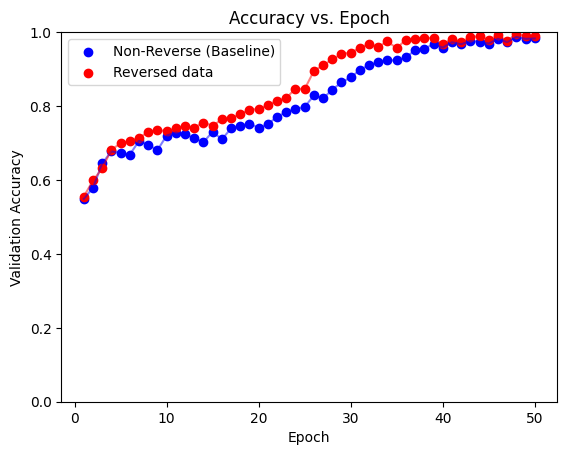

In [110]:
import matplotlib.pyplot as plt

# Draw the chart of valid accuracy vs. epoch for both non-reverse(baseline) and reverse data set
epochs = range(1, len(history.history['val_accuracy']) + 1)

plt.scatter(epochs, history.history['val_accuracy'], label='Non-Reverse (Baseline)', color='blue')
plt.scatter(epochs, history2.history['val_accuracy'], label='Reversed data', color='red')
plt.plot(epochs, history.history['val_accuracy'], linestyle='-', color='blue', alpha=0.5)
plt.plot(epochs, history2.history['val_accuracy'], linestyle='-', color='red', alpha=0.5)

plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()